In [2]:
import numpy as np

Computes wheels speeds based on encoder readings

In [4]:
def get_wheels_speeds(encoderValues, oldEncoderValues, pulses_per_turn, delta_t):
    
    # calculate the change in angular position of the wheels
    angle_difference_left = 2 * np.pi * (encoderValues[0] - oldEncoderValues[0]) / pulses_per_turn
    angle_difference_right = 2 * np.pi * (encoderValues[1] - oldEncoderValues[1]) / pulses_per_turn

    # Calculate the angular speeds now
    left_wheel_vel = angle_difference_left / delta_t
    right_wheel_vel = angle_difference_right / delta_t

    return left_wheel_vel, right_wheel_vel

*Testing the function* with different values of encoder and delta t

In [17]:
pulses_per_rev = 50 # number or encoder ticks in one revolution of the wheel
deltat = 0.1 # time step in seconds
new_encodervalues = [1508, 1506]
old_encoderValues = [1500, 1500]

wl , wr = get_wheels_speeds(new_encodervalues, old_encoderValues, pulses_per_rev, deltat)
print(f'Left wheel speed: {wl} rad/s')
print(f'Right wheel speed: {wr} rad/s')



Left wheel speed: 10.053096491487338 rad/s
Right wheel speed: 7.539822368615503 rad/s


After getting the wheels speed, next step is to use it to get the robot chassis speed.
for this, we will use wheel radius 'R' and distance between both wheels 'D'

The function below calculates the linear and angular speeds of the robot based on the speeds of its wheels and its physical parameters: R is the radius of the wheels and D is the distance between the left and right wheels.

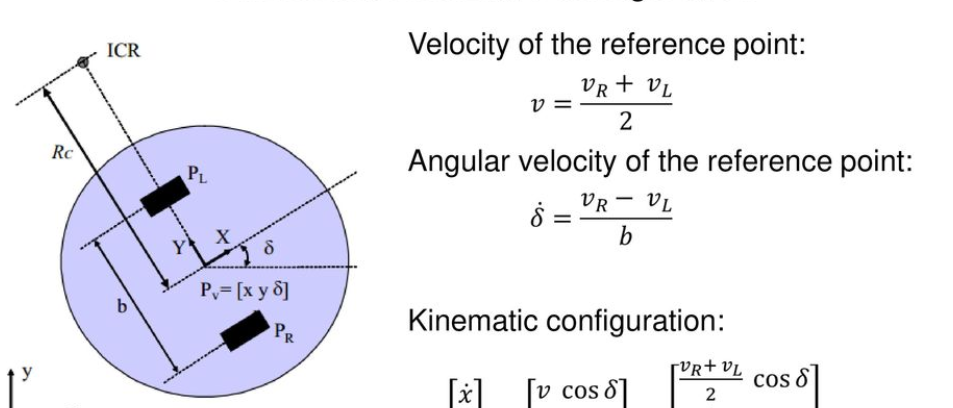

In [18]:
# Computes robot linear and angular speeds
def get_robot_speed(wl, wr, R, D):
    u = (wr + wl) * R / 2.0 # linear speed
    w = (wr - wl) * R / D # angular speed
    return u, w

    

Testing the get_robot_speed function using the physical parameters of the e-puck robot
R = 0.0205 (20.5mm), 
D = 0.052 (52mm)

In [19]:
R = 0.205
D = 0.052
u, w = get_robot_speed(wl, wr, R, D)
print(f"Robot Linear Speed: {u} m/s")
print(f"Robot Angular Speed: {w} rad/s")


Robot Linear Speed: 1.8032741831605412 m/s
Robot Angular Speed: -9.908099907475505 rad/s


let's now calculate the robot pose based on the kinematic model, previous pose and robot speed

In [ ]:
def get_robot_pose(u, w, x_old, y_old, phi_old, delta_t):
    pass # to be implemented